# What drives the price of a car?

![](images/kurt.jpeg)

In [284]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

Our goal here is to understand what drives the price of car, simple enough! For a (used) car dealer, knowing the factors of the market and customer are key to determining this price. For example, understanding what cars are trending, or useful for a specific need (speed or utility, or other attributes) can lead to a reasoning behind the price of a vehicle (more or less the demand/supply of a car). 

As such, building a data-driven model that can extrapolate against a set of used car data, and provide a predicted price based on various paramaters would be useful in aiding car salesman in regards to the price of the car they are about to buy.sell. 

We have been given a dataset about used cars with 426k entries. We will likely need to clean the data of any missing values or outliers. While this may lower the total records we can model against, it will be more accurate.  

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

First thing to do is check out our dataset.

In [294]:
#Load dataset into pandas
car_data = pd.read_csv('data/vehicles.csv')
car_data.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


And maybe some information about some of the statistical data of the set we are looking at.

In [296]:
car_data.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


It would also be important to see what kind of data quality we are dealing with. Exploring some of these details like null values or outliers in data would be beneficial.

In [298]:
#Get some info about each column
car_data.info()

#And lets verify the nulls per column
car_data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

As we know, we have 426k records, so some of these columns with larger values are a bit concerning. These entities will likely be cleaned up in the next section.

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [301]:
data_copy = car_data.copy().dropna()
print(data_copy.head())
print(car_data.shape[0] - data_copy.shape[0])

             id      region  price    year manufacturer              model  \
126  7305672709      auburn      0  2018.0    chevrolet  express cargo van   
127  7305672266      auburn      0  2019.0    chevrolet  express cargo van   
128  7305672252      auburn      0  2018.0    chevrolet  express cargo van   
215  7316482063  birmingham   4000  2002.0       toyota               echo   
219  7316429417  birmingham   2500  1995.0          bmw               525i   

     condition    cylinders fuel  odometer title_status transmission  \
126   like new  6 cylinders  gas   68472.0        clean    automatic   
127   like new  6 cylinders  gas   69125.0        clean    automatic   
128   like new  6 cylinders  gas   66555.0        clean    automatic   
215  excellent  4 cylinders  gas  155000.0        clean    automatic   
219       fair  6 cylinders  gas  110661.0        clean    automatic   

                   VIN drive       size   type paint_color state  
126  1GCWGAFP8J1309579   rwd  f

With roughly 35k entries removed, we've made a good start. Let's normalize more of the data by removing unnessary fields (more specifically ones that do nothing for the correlation).

In [304]:
data_copy.drop('VIN', axis = 1, inplace = True)
data_copy.drop('region', axis = 1, inplace = True)
data_copy.drop('id', axis = 1, inplace = True)

print(data_copy)
data_copy.isnull().sum()

        price    year manufacturer              model  condition    cylinders  \
126         0  2018.0    chevrolet  express cargo van   like new  6 cylinders   
127         0  2019.0    chevrolet  express cargo van   like new  6 cylinders   
128         0  2018.0    chevrolet  express cargo van   like new  6 cylinders   
215      4000  2002.0       toyota               echo  excellent  4 cylinders   
219      2500  1995.0          bmw               525i       fair  6 cylinders   
...       ...     ...          ...                ...        ...          ...   
426788  12995  2016.0    chevrolet           cruze lt   like new  4 cylinders   
426792  32999  2014.0         ford          f350, xlt  excellent  8 cylinders   
426793  15999  2018.0    chevrolet          cruze, lt  excellent  4 cylinders   
426833   6800  1997.0       jaguar    xk8 convertible       good  8 cylinders   
426836      0  2018.0          ram               2500  excellent  6 cylinders   

          fuel  odometer ti

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

There is also some invalid data (or data that may corrupt our modeling) that we need to take care of. Let's take a look at some and finalize our dataset.

In [307]:
print(data_copy.eq(0).any()) #results in odometer and price having 0 values, which we will target to remove
data_copy.drop(data_copy[data_copy['price'] == 0].index, inplace = True)
data_copy.drop(data_copy[data_copy['odometer'] == 0].index, inplace = True)

print(data_copy)

#we also need to ensure all values are numerical
model_data = pd.get_dummies(data_copy, drop_first = True)

price            True
year            False
manufacturer    False
model           False
condition       False
cylinders       False
fuel            False
odometer         True
title_status    False
transmission    False
drive           False
size            False
type            False
paint_color     False
state           False
dtype: bool
        price    year   manufacturer            model  condition    cylinders  \
215      4000  2002.0         toyota             echo  excellent  4 cylinders   
219      2500  1995.0            bmw             525i       fair  6 cylinders   
268      9000  2008.0          mazda       miata mx-5  excellent  4 cylinders   
337      8950  2011.0           ford            f-150  excellent  6 cylinders   
338      4000  1972.0  mercedes-benz             benz       fair  6 cylinders   
...       ...     ...            ...              ...        ...          ...   
426785  23495  2015.0           ford     f150 xlt 4x4   like new  8 cylinders   
426788  12

With that, I think we can do some modeling on this data.

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [311]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew
import matplotlib.ticker as ticker


X = model_data.drop(['price'], axis = 1)
y = model_data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [312]:
model = LinearRegression(fit_intercept = False)
model.fit(X_train, y_train)

#lets gets some stats about our model

print("Coef: ", model.coef_)
print("Intercept: ", model.intercept_)

Coef:  [ 8.54717608e+02 -1.51387696e-02  1.84848044e+10 ... -5.59044475e+03
 -6.10839448e+03 -3.45336716e+03]
Intercept:  0.0


In [313]:
#and then let's see what predictions we can generate
train_predictions = model.predict(X_train)
print(train_predictions)

#and score and RMSE
score = model.score(X_train, y_train)
print("Score: ", round(score * 100, 2))
print("RMSE: ", round(np.sqrt(mean_squared_error(y_train, train_predictions)), 2))

[14335.57556206 18108.73896885  1545.68016994 ...  8801.45072749
  7153.21363944 13862.7577647 ]
Score:  78.53
RMSE:  6088.28


A score of 78 isn't so bad considering that a lot of our dataset is simple, but supply/demand can be unpredictable at times. But we should compare it against our test data.

In [316]:
test_predictions = model.predict(X_test)
print(test_predictions)

score = model.score(X_test, y_test)
print("Score: ", round(score * 100, 2))
print("RMSE: ", round(np.sqrt(mean_squared_error(y_train, train_predictions)), 2)) #THIS DATA IS VERY INCORRECT FOR SOME REASON??

[-2.55593869e+10  2.61325316e+04  1.96215553e+04 ...  1.02232756e+04
  3.34113597e+04  3.32377937e+04]
Score:  -7253688666769.74
RMSE:  6088.28


Text(0.5, 1.0, 'Odometer vs Price')

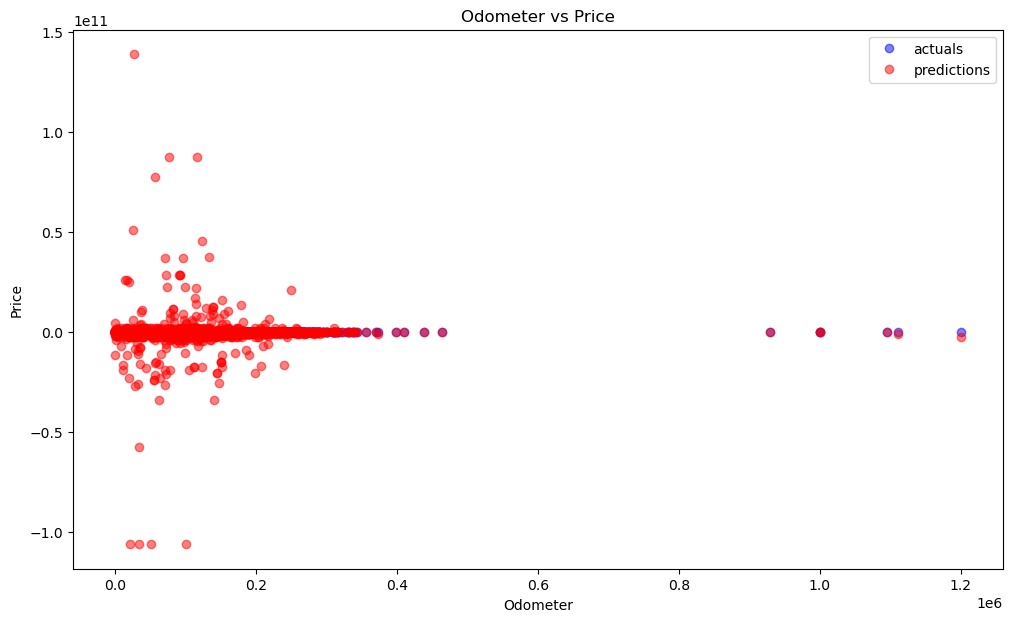

In [317]:
#Lets visualize some of the regression (Odometer vs Price)
fig, axes = plt.subplots(1, 1, figsize =(12, 7))
axes.plot (X_test.odometer, y_test, 'ob', label ='actuals', alpha=0.5)
axes.plot (X_test.odometer, test_predictions, 'or', label ='predictions', alpha=0.5)
axes.set(xlabel='Odometer', ylabel='Price')
axes.legend()
axes.set_title('Odometer vs Price')

Text(0.5, 1.0, 'Year vs Price')

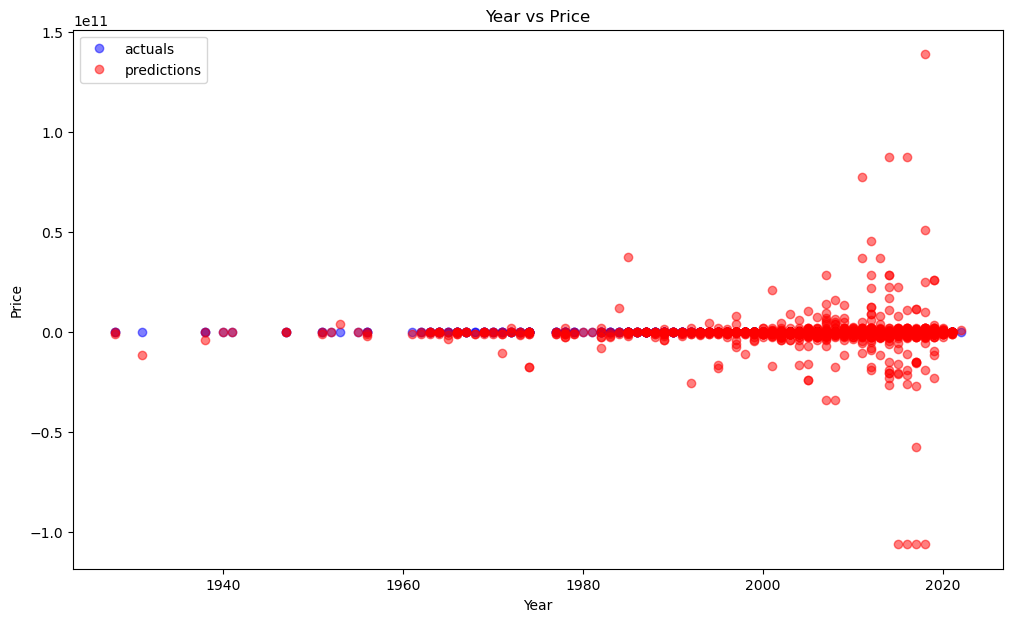

In [319]:
# more visualization of the regression (Year vs Price)
fig, axes = plt.subplots(1, 1, figsize =(12, 7))
axes.plot (X_test.year, y_test, 'ob', label ='actuals', alpha=0.5)
axes.plot (X_test.year, test_predictions, 'or', label ='predictions', alpha=0.5)
axes.set(xlabel='Year', ylabel='Price')
axes.legend()
axes.set_title('Year vs Price')

A short summary, it seems that the dataset needs a bit more pre-processing before our results are more refined. As we can see from the diagrams, the regression results between the training and testing data are similar-ish?? but there are some outliers that may have gotten through from the inital rounds of cleaning.

In [321]:
np.corrcoef(y_test, test_predictions) [0][1] #bad correlation

-0.01656901673542797

In [322]:
new_model = pd.get_dummies(data_copy[['odometer', 'year', 'price', 'condition', 'fuel', 'size', 'drive']], drop_first = True)
new_X = new_model[['odometer', 'year']]
new_y = new_model.price
newX_train, newX_test, newY_train, newY_test = train_test_split(new_X, new_y, test_size = 0.3, random_state = 42)

In [323]:
pipe = Pipeline([
                ('normalize', QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)), 
                ('model', LinearRegression())])

In [325]:
pipe.fit(newX_train, newY_train)

predictions_train = pipe.predict(newX_train)
predictions_test = pipe.predict(newX_test)

print("RMSE: ", round(np.sqrt(mean_squared_error(newY_train, predictions_train)), 2))

RMSE:  11223.7


In [326]:
#and run it again with a diff model
pipe = Pipeline([
                ('normalize', QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)), 
                ('model', Ridge(alpha=0.5))])

pipe.fit(newX_train, newY_train)

predictions_train_ridge = pipe.predict(newX_train)
predictions_test_ridge = pipe.predict(newX_test)

print("RMSE: ", round(np.sqrt(mean_squared_error(newY_train, predictions_train_ridge)), 2))

RMSE:  11224.25


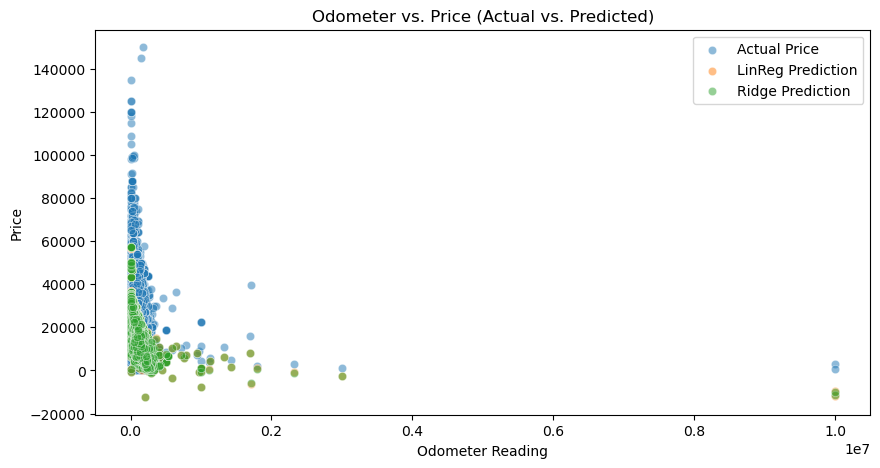

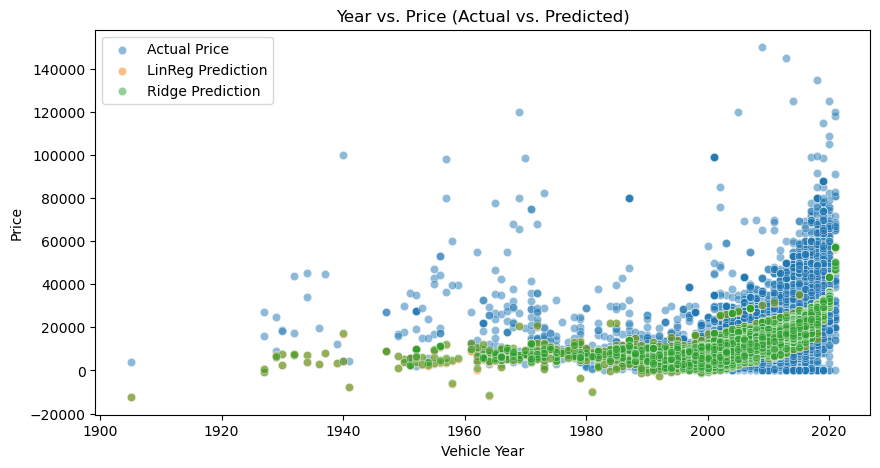

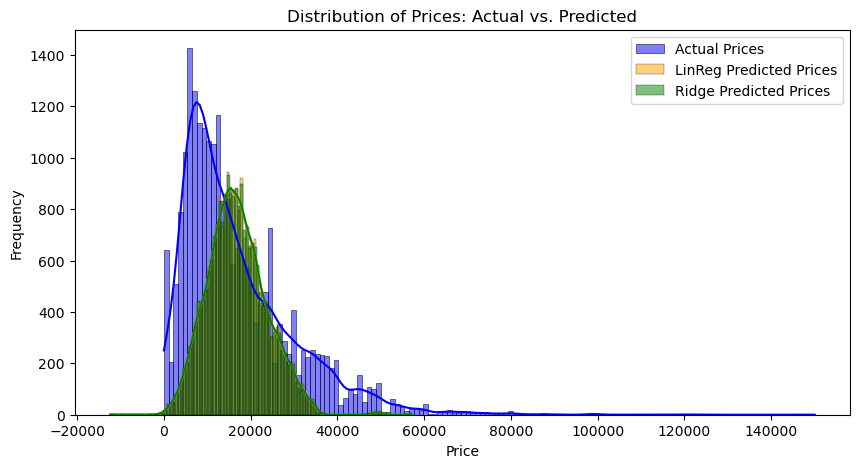

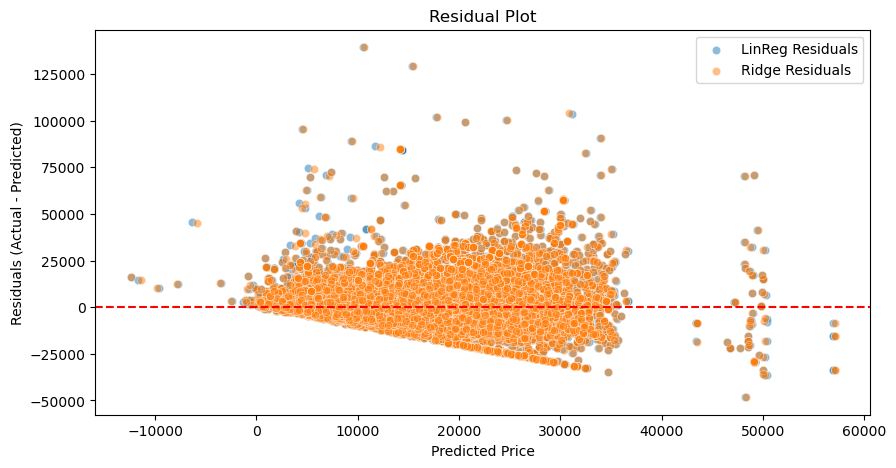

In [327]:
#visualization of the two models

#Odometer vs price
plt.figure(figsize=(10, 5))
sns.scatterplot(x=newX_train['odometer'], y=newY_train, label='Actual Price', alpha=0.5)
sns.scatterplot(x=newX_train['odometer'], y=predictions_train, label='LinReg Prediction', alpha=0.5)
sns.scatterplot(x=newX_train['odometer'], y=predictions_train_ridge, label='Ridge Prediction', alpha=0.5)
plt.xlabel("Odometer Reading")
plt.ylabel("Price")
plt.title("Odometer vs. Price (Actual vs. Predicted)")
plt.legend()
plt.show()

#Year vs price
plt.figure(figsize=(10, 5))
sns.scatterplot(x=newX_train['year'], y=newY_train, label='Actual Price', alpha=0.5)
sns.scatterplot(x=newX_train['year'], y=predictions_train, label='LinReg Prediction', alpha=0.5)
sns.scatterplot(x=newX_train['year'], y=predictions_train_ridge, label='Ridge Prediction', alpha=0.5)
plt.xlabel("Vehicle Year")
plt.ylabel("Price")
plt.title("Year vs. Price (Actual vs. Predicted)")
plt.legend()
plt.show()

#Distribution of prices
plt.figure(figsize=(10, 5))
sns.histplot(newY_train, label="Actual Prices", kde=True, color='blue', alpha=0.5)
sns.histplot(predictions_train, label="LinReg Predicted Prices", kde=True, color='orange', alpha=0.5)
sns.histplot(predictions_train_ridge, label="Ridge Predicted Prices", kde=True, color='green', alpha=0.5)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of Prices: Actual vs. Predicted")
plt.legend()
plt.show()

#And a residual plot to see how well our models were fitted
residuals = newY_train - predictions_train  # Errors in Linear Regression
residuals_ridge = newY_train - predictions_train_ridge  # Errors in Ridge Regression

plt.figure(figsize=(10, 5))
sns.scatterplot(x=predictions_train, y=residuals, label="LinReg Residuals", alpha=0.5)
sns.scatterplot(x=predictions_train_ridge, y=residuals_ridge, label="Ridge Residuals", alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')  # Reference line at zero
plt.xlabel("Predicted Price")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.legend()
plt.show()

However, I still think there is too much data, so I want to run one more analysis to ensure accuracy! I think that our attributes that we are monitoring are fine, but there are still outliers in the data such as irrelevant years and maybe even irrelevant prices, let's see what we can do.

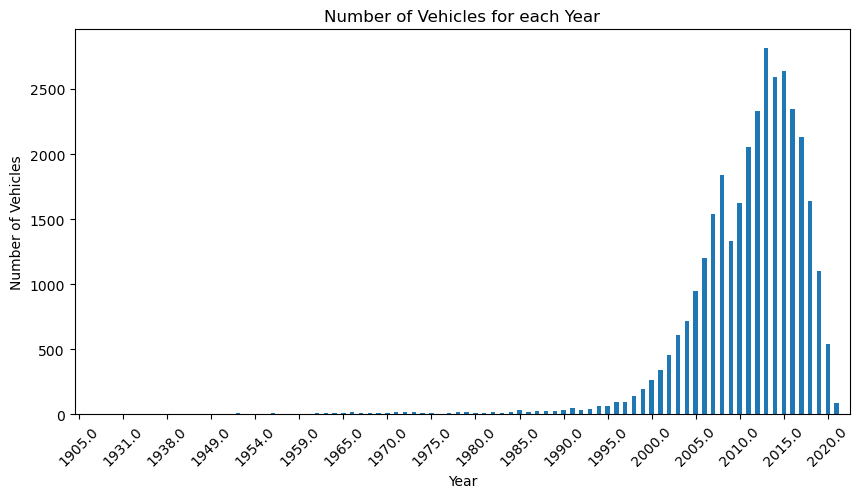

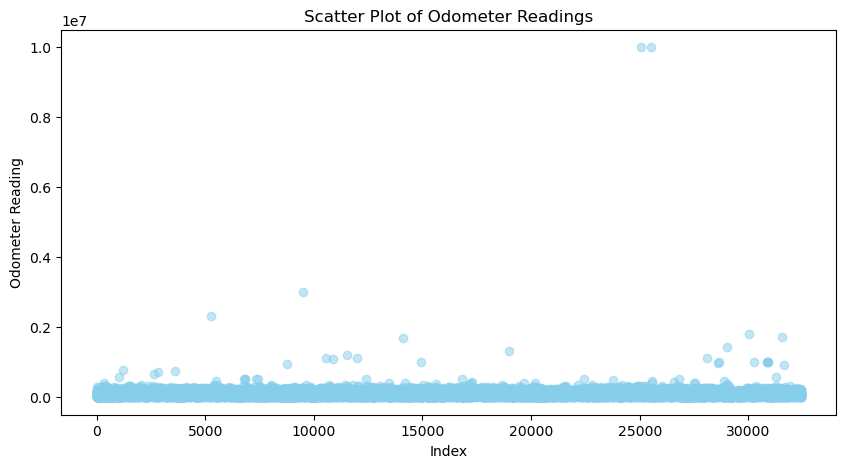

Skewness: 1.70


In [329]:
#Let's see what we can do here in terms of cleaning
year_counts = data_copy['year'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
year_counts.plot(kind='bar')

tick_positions = range(0, len(year_counts), 5) 
tick_labels = year_counts.index[tick_positions] 
plt.xticks(tick_positions, tick_labels, rotation=45)

plt.xlabel("Year")
plt.ylabel("Number of Vehicles")
plt.title("Number of Vehicles for each Year")
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(range(len(data_copy)), data_copy['odometer'], alpha=0.5, color='skyblue')
plt.title("Scatter Plot of Odometer Readings")
plt.xlabel("Index")
plt.ylabel("Odometer Reading")
plt.show()


price_skewness = skew(data_copy['price'])
print(f"Skewness: {price_skewness:.2f}") #resulted in 1.7, so we will go with IQR to get rid of some the prices

Q1 = data_copy['price'].quantile(0.25) 
Q3 = data_copy['price'].quantile(0.75) 
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

new_data = data_copy[(data_copy['price'] >= lower_bound) & (data_copy['price'] <= upper_bound) & (data_copy['year'] >= 1995) & (data_copy['odometer'] <= 65000)]

So a quick summary, we looked at the distribution of values for years, and most of the data seems to be from 1995+. Additionally, we cleaned up any prices from that were way out of the norm using IQR, so let's re-run our processes now!

In [332]:
new_model = pd.get_dummies(new_data[['odometer', 'year', 'price', 'condition', 'fuel', 'size', 'drive']], drop_first = True)
new_X = new_model[['odometer', 'year']]
new_y = new_model.price
newX_train, newX_test, newY_train, newY_test = train_test_split(new_X, new_y, test_size = 0.3, random_state = 42)

pipe = Pipeline([
                ('normalize', QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)), 
                ('model', LinearRegression())])

pipe.fit(newX_train, newY_train)

predictions_train = pipe.predict(newX_train)
predictions_test = pipe.predict(newX_test)

print("RMSE: ", round(np.sqrt(mean_squared_error(newY_train, predictions_train)), 2)) #vs a previous RMSE of 11226.18


RMSE:  11435.06


In [333]:
#and run it again with a diff model
pipe = Pipeline([
                ('normalize', QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)), 
                ('model', Ridge(alpha=0.5))])

pipe.fit(newX_train, newY_train)

predictions_train_ridge = pipe.predict(newX_train)
predictions_test_ridge = pipe.predict(newX_test)

print("RMSE: ", round(np.sqrt(mean_squared_error(newY_train, predictions_train_ridge)), 2)) #vs a previous RMSE of 11219.81

RMSE:  11435.06


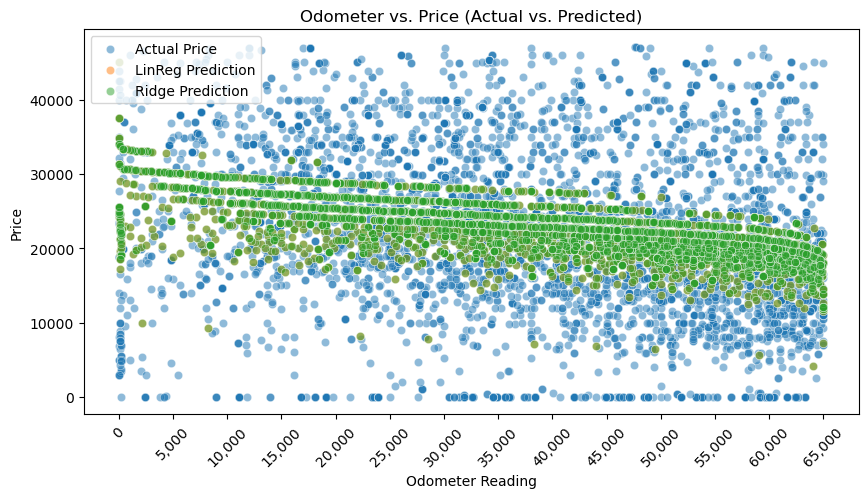

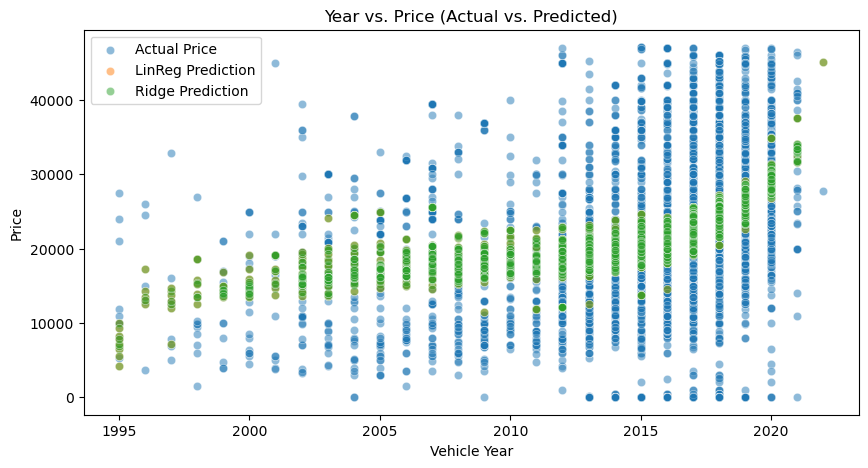

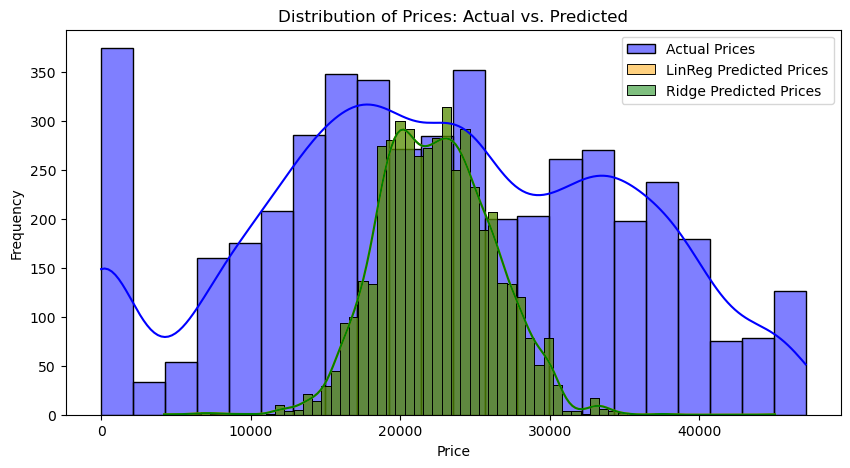

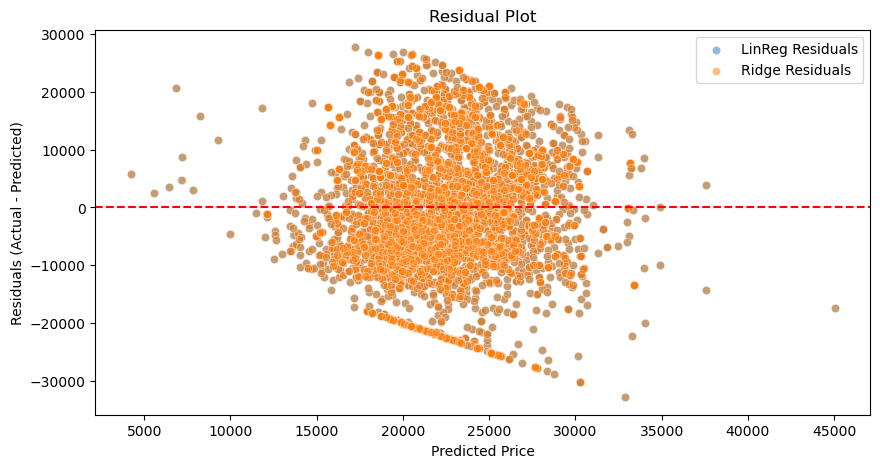

In [334]:
#Lastly time to run the full suite of visualizations from before to see improvements
#visualization of the two models

#Odometer vs price
plt.figure(figsize=(10, 5))
sns.scatterplot(x=newX_train['odometer'], y=newY_train, label='Actual Price', alpha=0.5)
sns.scatterplot(x=newX_train['odometer'], y=predictions_train, label='LinReg Prediction', alpha=0.5)
sns.scatterplot(x=newX_train['odometer'], y=predictions_train_ridge, label='Ridge Prediction', alpha=0.5)
plt.xticks(rotation=45)
# Set x-axis ticks at 50,000 intervals (adjust as needed)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5000))

# Format x-axis labels to remove decimals
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xlabel("Odometer Reading")
plt.ylabel("Price")
plt.title("Odometer vs. Price (Actual vs. Predicted)")
plt.legend()
plt.show()

#Year vs price
plt.figure(figsize=(10, 5))
sns.scatterplot(x=newX_train['year'], y=newY_train, label='Actual Price', alpha=0.5)
sns.scatterplot(x=newX_train['year'], y=predictions_train, label='LinReg Prediction', alpha=0.5)
sns.scatterplot(x=newX_train['year'], y=predictions_train_ridge, label='Ridge Prediction', alpha=0.5)
plt.xlabel("Vehicle Year")
plt.ylabel("Price")
plt.title("Year vs. Price (Actual vs. Predicted)")
plt.legend()
plt.show()

#Distribution of prices
plt.figure(figsize=(10, 5))
sns.histplot(newY_train, label="Actual Prices", kde=True, color='blue', alpha=0.5)
sns.histplot(predictions_train, label="LinReg Predicted Prices", kde=True, color='orange', alpha=0.5)
sns.histplot(predictions_train_ridge, label="Ridge Predicted Prices", kde=True, color='green', alpha=0.5)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of Prices: Actual vs. Predicted")
plt.legend()
plt.show()

#And a residual plot to see how well our models were fitted
residuals = newY_train - predictions_train  # Errors in Linear Regression
residuals_ridge = newY_train - predictions_train_ridge  # Errors in Ridge Regression

plt.figure(figsize=(10, 5))
sns.scatterplot(x=predictions_train, y=residuals, label="LinReg Residuals", alpha=0.5)
sns.scatterplot(x=predictions_train_ridge, y=residuals_ridge, label="Ridge Residuals", alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--') 
plt.xlabel("Predicted Price")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.legend()
plt.show()

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

The data we received required some cleaning up to do, and given the nature of the data we were working with, and what we are trying to achieve here, this was not ideal. Some of the data wasn't realistic (such as prices being 0, odometer readings being invalid or improbably), and so we needed to normalize some of the data to ensure accuracy. Additionally, there were a lot of attributes at play that could influence the price, but creating a model that could handle many features starts to get more challenging. To keep it simple, we isolated a few of the attributes to train against, but this takes away from the sheer variety in factors that could influence the price of a vehicle.

That being said, we could still extrapolate against the data, even if the reports weren't with a lot of confidence. We could assess trends from the visualizations, and make an (albeit rudimentary) estimate on the price of a vehicle. However, I would recommend a more robust dataset with more accurate (or even relevant) entries to ensure that future models can make better  predictions.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

Hello {dealership group}! I've taken the time to analyze the data about roughly 400 thousand used car sales over a period of time to see how we can better market and price our vehicles for better sales.  

Our first step was cleaning up the data, there were a few inaccuracies that could corrupt our results.  An important step then was to take clean up our data, which involved removing invalid entries such as incorrect pricing, irrelevant information to the cost, or just generally bad data. After we cleaned up the data, we isolated a group of attributes about these used cars to see how they would affect prices depending on their values. For this endeavor, we stuck with total miles done by the vehicle (odometer reading), year of the vehicle, condition of the vehicle, the type of fuel it ran on, size of the vehicle (sedan, suv, etc.), and drivetrain (rear wheel drive, front wheel drive, and all wheel drive).

The key takeway from our analysis of this dataset is that year and odometer were the biggest correlating factors. While its true that the other attributes of a vehicle can influence the price of a vehicle, using the year and miles the vehicle has done as base metrics should generally give a good idea on how to effectively price the vehicle. Generally, a newer car with less miles will be more expensive than an older car with a lot of miles (the two edges of our distribution). The general distributions of vehicle prices will fall within the middle of these two attributes (not too old or new, and not too many or too little miles).

However, even though we did see a trend (even if it was visualized a bit poorly), I think we should first consider making a dataset that is more comprehensive before we begin any analysis. We needed to filter out some of the data that was presented, and more data means more accuracy across a larger range of predictions (i.e. more attributes and refined predictions requires more data). Additionally, there are more features such as accessbility (things like keyless start/entry) or other features that clients like in their vehicles, that could contribute to the price on the vehicle. I would also recommend that we aim to collect only a certain amount of historical data. Cars from even 20 years ago are starting to become a little less relevant so ensuring that we collect more data from a relevant time range would also be beneficial.